In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression

# from miwae import miwae
# from metrics import tau_dr, tau_ols, tau_ols_ps
# from generate_data import gen_lrmf, ampute, gen_dlvm

l_tau = ['tau_dr', 'tau_ols', 'tau_ols_ps', 'mul_tau_dr', 'mul_tau_ols', 'mul_tau_ols_ps']

In [4]:
df = pd.read_csv('results/plot_epoch_dlvm_01.csv')
#df = pd.read_csv('results/plot_epoch_th.csv')
df.drop(labels='Unnamed: 0', inplace=True, axis=1)
df

,model,n,n_epochs,tau_dr,tau_ols,tau_ols_ps,mul_tau_dr,mul_tau_ols,mul_tau_ols_ps
0,dlvm,200,10,1.050830,1.052210,1.054574,1.025225,1.025320,1.025719
1,dlvm,200,100,0.974318,0.977434,0.984073,1.013609,1.013774,1.013671
2,dlvm,200,400,1.023911,1.025937,1.028235,1.025962,1.027473,1.030208
3,dlvm,200,600,1.014543,1.010447,1.013046,1.015543,1.011770,1.013752
4,dlvm,200,800,0.967291,0.969408,0.974649,0.968286,0.970354,0.975569
5,dlvm,1000,10,0.966397,0.966628,0.966834,0.971837,0.972000,0.972169
6,dlvm,1000,100,0.963581,0.963697,0.964164,0.973094,0.973115,0.972975
7,dlvm,1000,400,1.010998,1.010598,1.010688,1.009144,1.009124,1.009064
8,dlvm,1000,600,1.004863,1.003516,1.003536,1.002985,1.002115,1.002201
9,dlvm,1000,800,1.000914,0.998225,0.998645,1.000029,0.997642,0.997968


In [28]:
def correlation_tau(df):
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    corr = df.corr()
    corr = df[l_tau].corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask=mask, center=0, #, cmap=cmap
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title('tau correlation')
    # plt.savefig('results/tau_correlation_xxx.png')

def plot(df, tau = 'tau_dr'):
    for n in np.unique(df['n']):
        df_group = df[df['n']==n]
        plt.plot(df_group['n_epochs'], df_group[tau], label='n = ' + str(n))
        plt.xlabel('n_epochs')
        plt.ylabel(tau)
        plt.legend()
        plt.hlines(y=1, xmin = min(0,np.min(df_group['n_epochs'])), 
                   xmax = np.max(df_group['n_epochs']), linewidth=1, color='k',
                   label='True ATE')
    
def plot_all_tau(df):
    l_tau = ['tau_dr', 'tau_ols', 'tau_ols_ps', 'mul_tau_dr', 'mul_tau_ols', 'mul_tau_ols_ps']
    plt.figure(figsize=(15,8))
    for i,tau in enumerate(l_tau):
        plt.subplot(3,2,i+1)
        plot(df, tau)

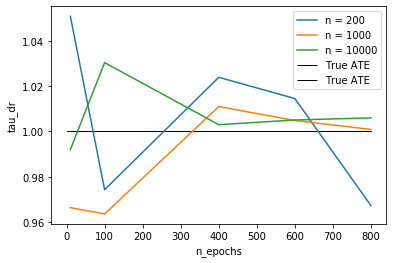

In [29]:
plot(df)

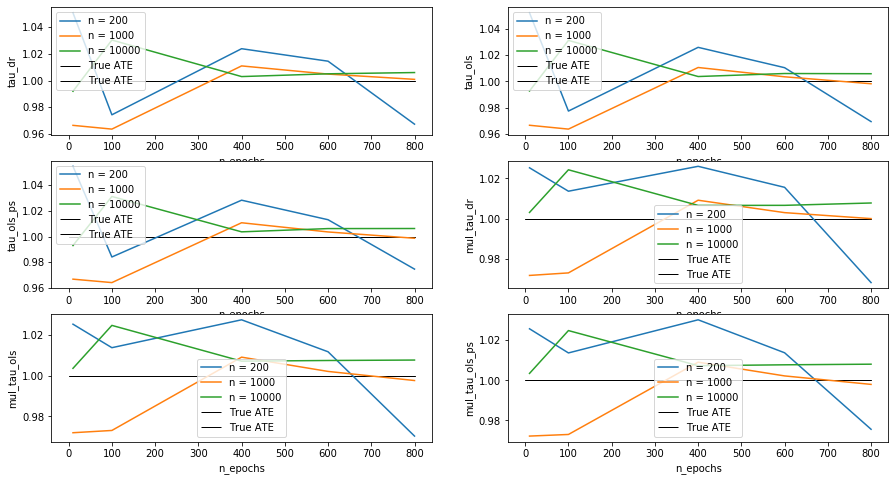

In [30]:
plot_all_tau(df)
# plt.savefig('results/n_epochs_xxx.png')

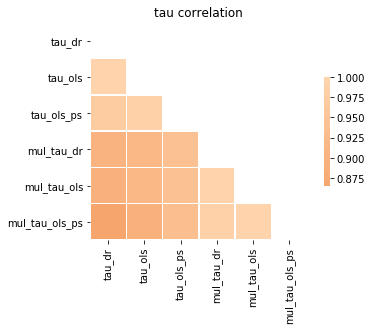

In [82]:
correlation_tau(df)